In [ ]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [ ]:
#Load the Dataset
#Reading the csv file 
df = pd.read_csv("E:/DevopsHeroVired/GenAI-DA/HousingPrices_New.csv") 
# Replace with your actual file name
print(df.head())    #displaying first 5 rows with head() function
print(df.info())    #displaying information of the table using info() function

           ID Date House was Sold  Sale Price  No of Bedrooms  \
0  7129300520           14-Oct-17    221900.0               3   
1  6414100192           14-Dec-17    538000.0               3   
2  5631500400           15-Feb-16    180000.0               2   
3  2487200875           14-Dec-17    604000.0               4   
4  1954400510           15-Feb-16    510000.0               3   

   No of Bathrooms  Flat Area (in Sqft)  Lot Area (in Sqft)  No of Floors  \
0             1.00               1180.0              5650.0           1.0   
1             2.25               2570.0              7242.0           2.0   
2             1.00                770.0             10000.0           1.0   
3             3.00               1960.0              5000.0           1.0   
4             2.00               1680.0              8080.0           1.0   

  Waterfront View No of Times Visited  ... Overall Grade  \
0              No                 NaN  ...             7   
1              No         

Missing Values:
ID                                               0
Date House was Sold                              0
Sale Price                                       4
No of Bedrooms                                   0
No of Bathrooms                                  4
Flat Area (in Sqft)                              9
Lot Area (in Sqft)                               9
No of Floors                                     0
Waterfront View                                  0
No of Times Visited                          19489
Condition of the House                           0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        3
Basement Area (in Sqft)                          0
Age of House (in Years)                          0
Renovated Year                                   0
Zipcode                                          1
Latitude                                         1
Longitude                                        1
Living Area aft

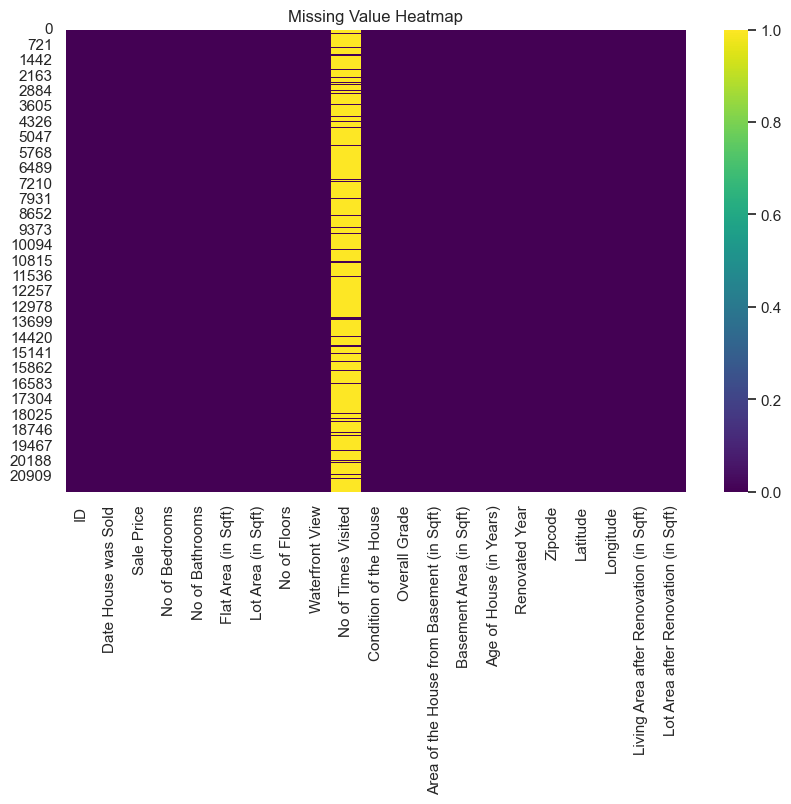

In [ ]:
#Check for Missing Values
print("Missing Values:")
print(df.isnull().sum())

# Visualize missing values
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.figure(figsize=(8, 6))
plt.title("Missing Value Heatmap")
plt.show()


In [16]:
#Descriptive Statistics (Mean, Median, Mode, etc.)

# Numerical summary
print("Descriptive Statistics:")
print(df.describe(include='all'))

# Individual stats
for col in df.select_dtypes(include=np.number).columns:
    print(f"\nColumn: {col}")
    print(f"Mean:   {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Mode:   {df[col].mode()[0]}")
    print(f"Std:    {df[col].std()}")
    print(f"Var:    {df[col].var()}")

Descriptive Statistics:
                  ID Date House was Sold    Sale Price  No of Bedrooms  \
count   2.161300e+04               21613  2.160900e+04    21613.000000   
unique           NaN                  13           NaN             NaN   
top              NaN           15-Apr-16           NaN             NaN   
freq             NaN                2231           NaN             NaN   
mean    4.580302e+09                 NaN  5.401984e+05        3.370842   
std     2.876566e+09                 NaN  3.673890e+05        0.930062   
min     1.000102e+06                 NaN  7.500000e+04        0.000000   
25%     2.123049e+09                 NaN  3.219500e+05        3.000000   
50%     3.904930e+09                 NaN  4.500000e+05        3.000000   
75%     7.308900e+09                 NaN  6.450000e+05        4.000000   
max     9.900000e+09                 NaN  7.700000e+06       33.000000   

        No of Bathrooms  Flat Area (in Sqft)  Lot Area (in Sqft)  \
count      21609.00


Outliers in ID: 0


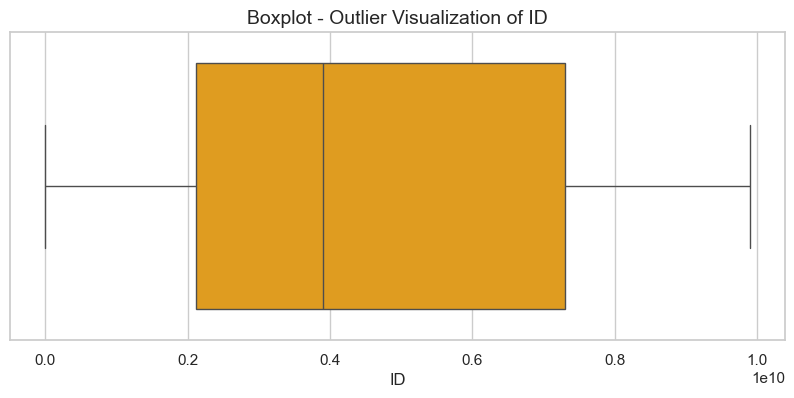


Outliers in Sale Price: 1159


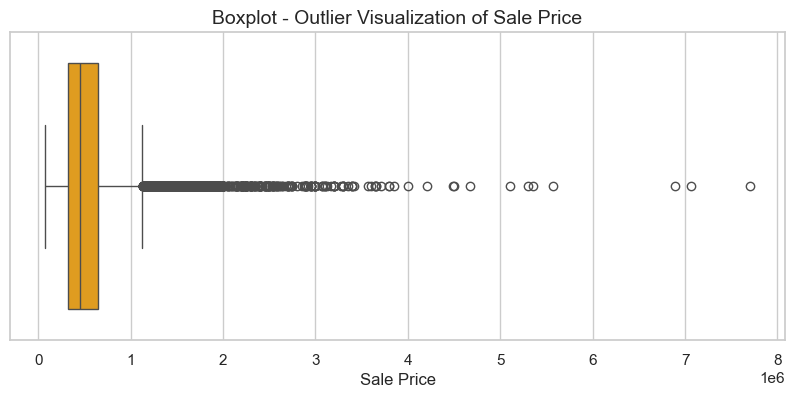


Outliers in No of Bedrooms: 546


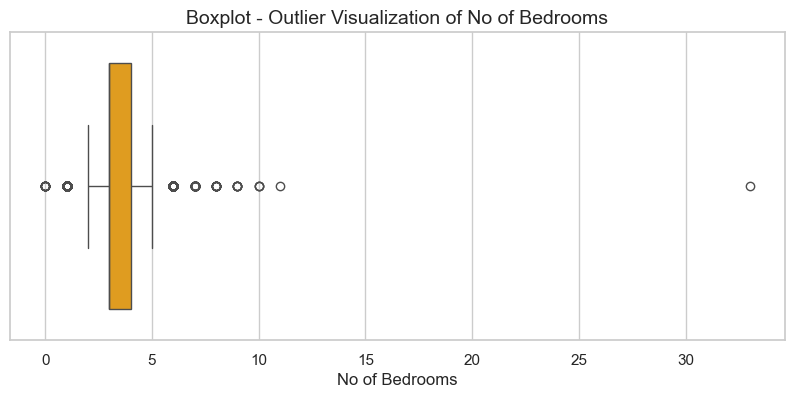


Outliers in No of Bathrooms: 571


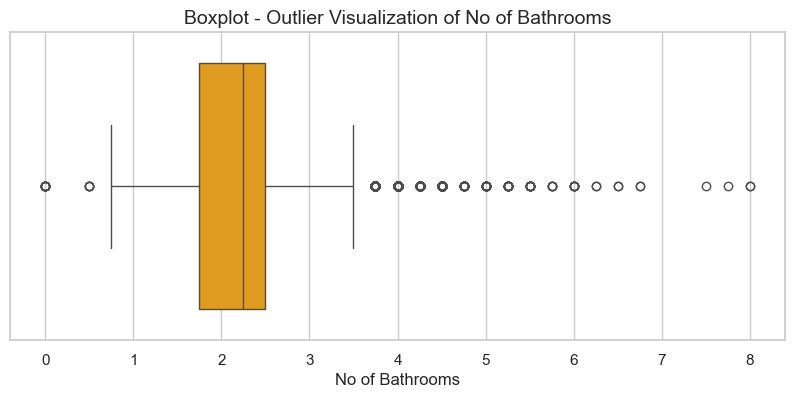


Outliers in Flat Area (in Sqft): 572


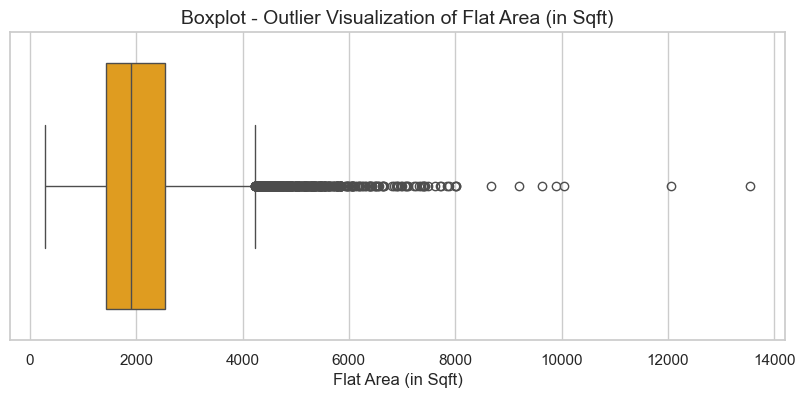


Outliers in Lot Area (in Sqft): 2423


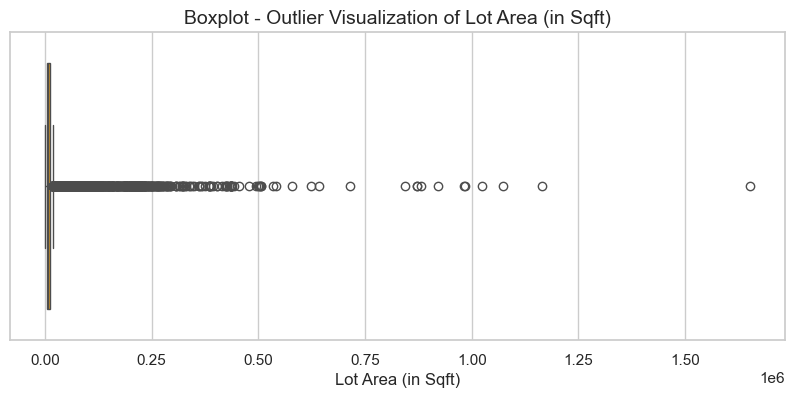


Outliers in No of Floors: 0


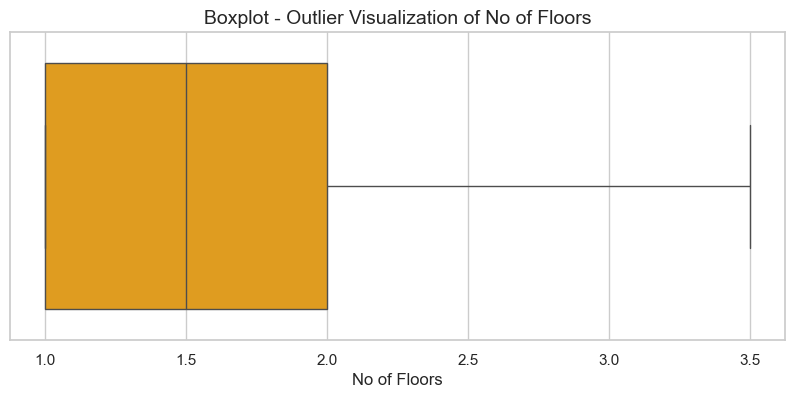


Outliers in Overall Grade: 1911


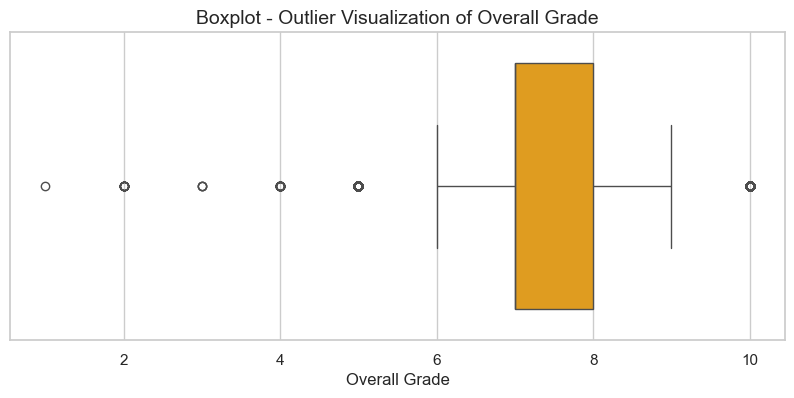


Outliers in Area of the House from Basement (in Sqft): 610


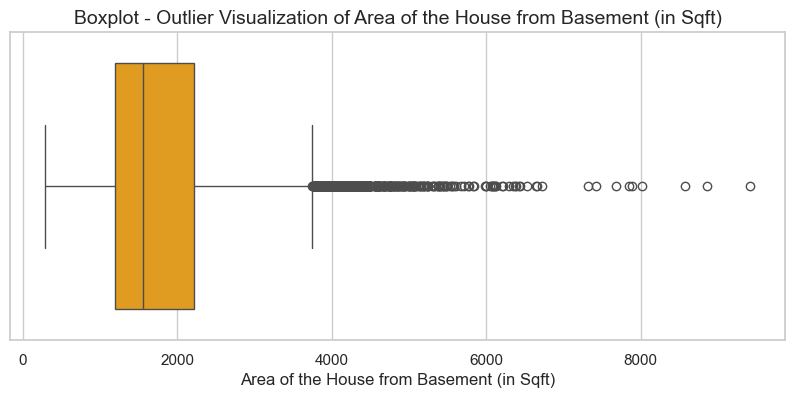


Outliers in Basement Area (in Sqft): 496


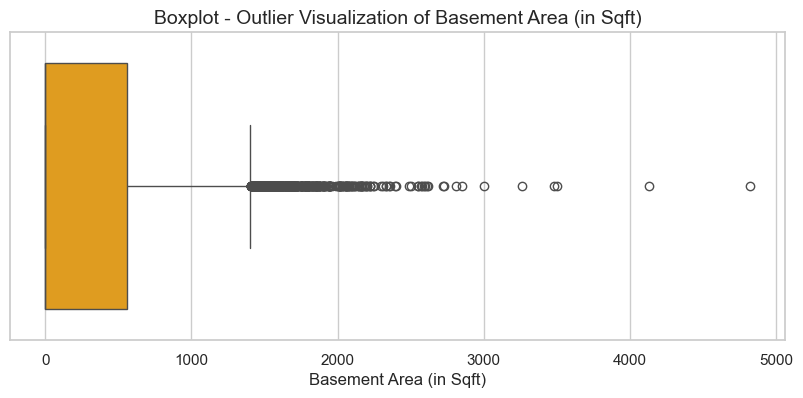


Outliers in Age of House (in Years): 0


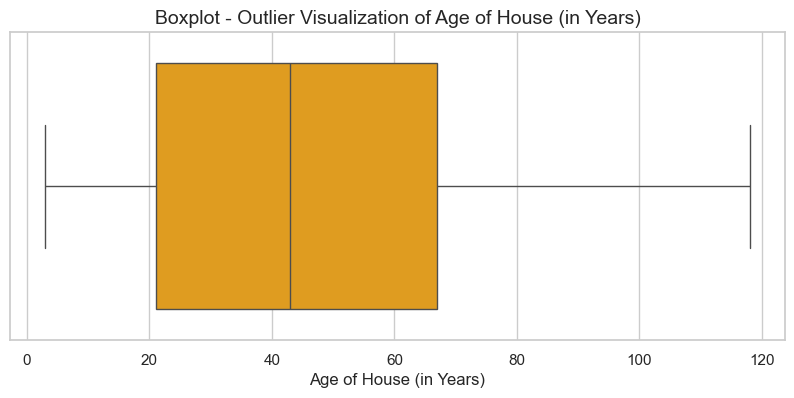


Outliers in Renovated Year: 914


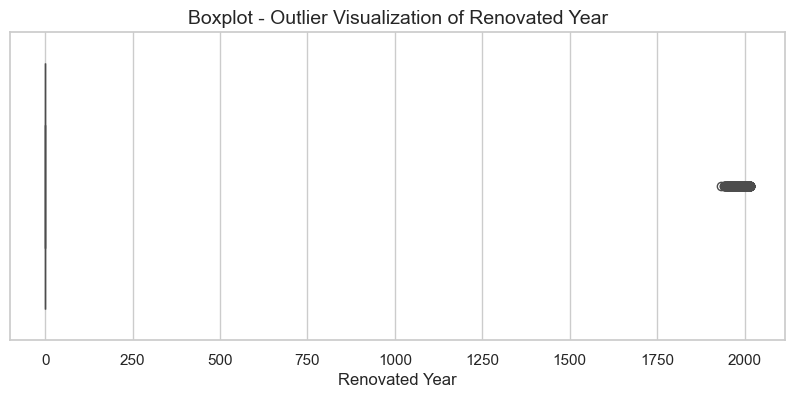


Outliers in Zipcode: 0


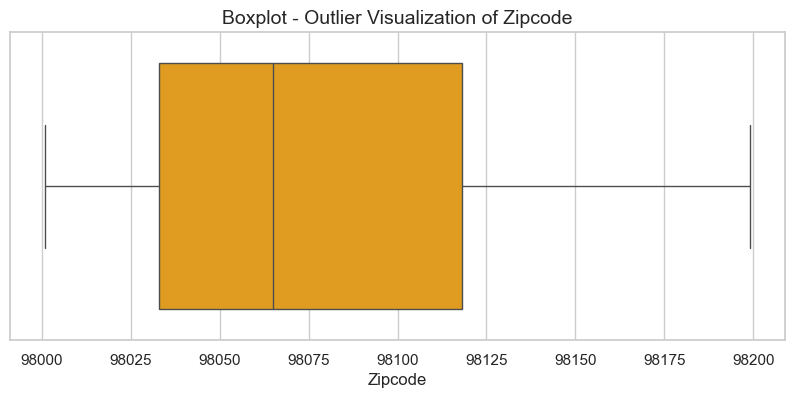


Outliers in Latitude: 2


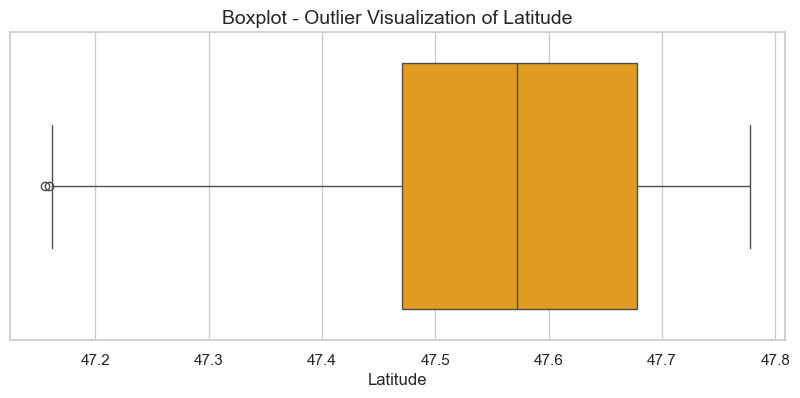


Outliers in Longitude: 256


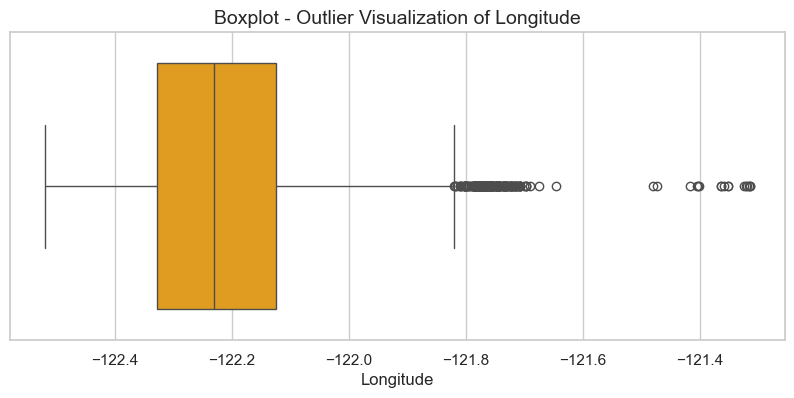


Outliers in Living Area after Renovation (in Sqft): 544


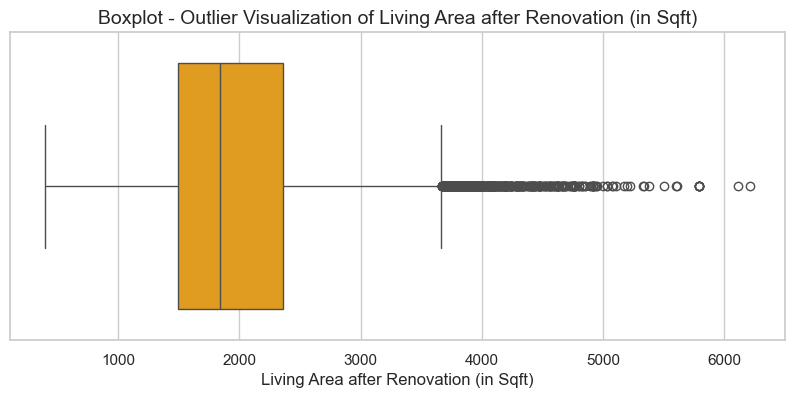


Outliers in Lot Area after Renovation (in Sqft): 2194


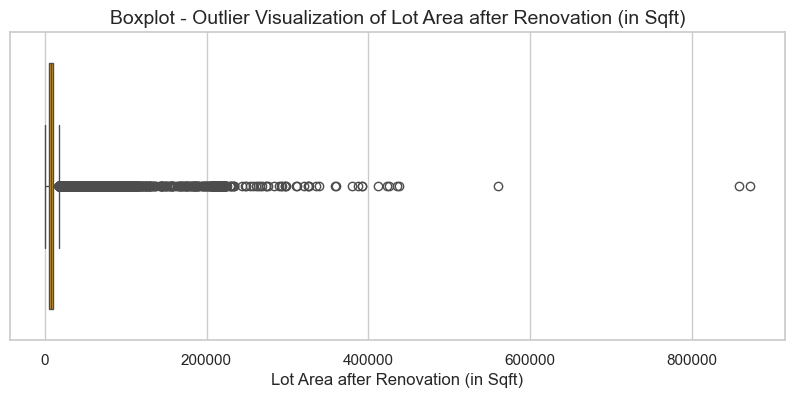

In [37]:
#Outlier Detection (IQR Method)

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

for col in df.select_dtypes(include=np.number).columns:
    out = detect_outliers_iqr(df, col)
    print(f"\nOutliers in {col}: {len(out)}")
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col], color="orange", linewidth=1)
    plt.title(f"Boxplot - Outlier Visualization of {col}", fontsize=14)
    plt.xlabel(col)
    plt.show()


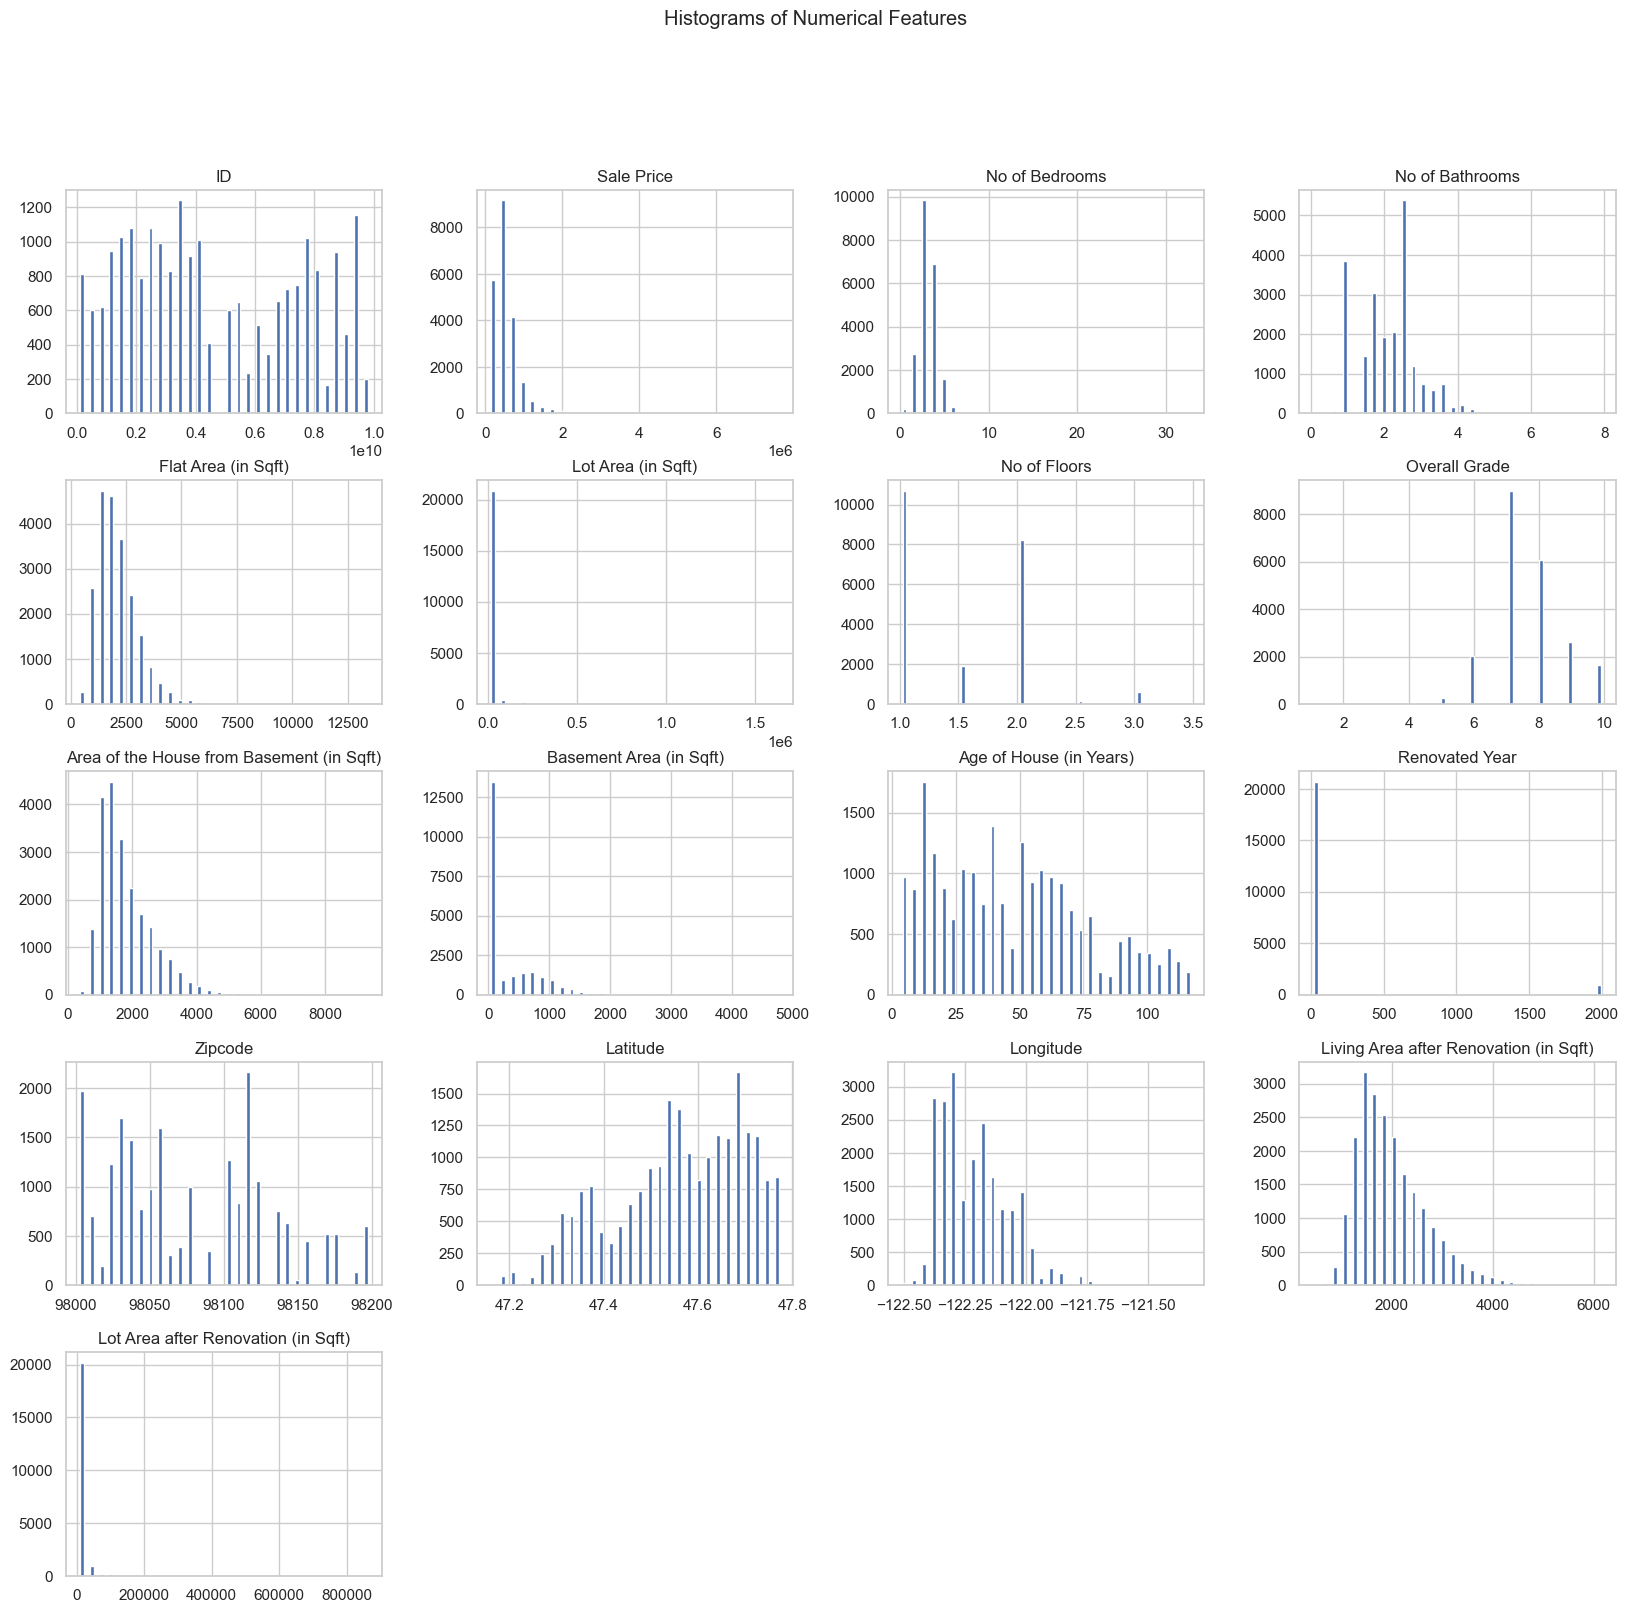

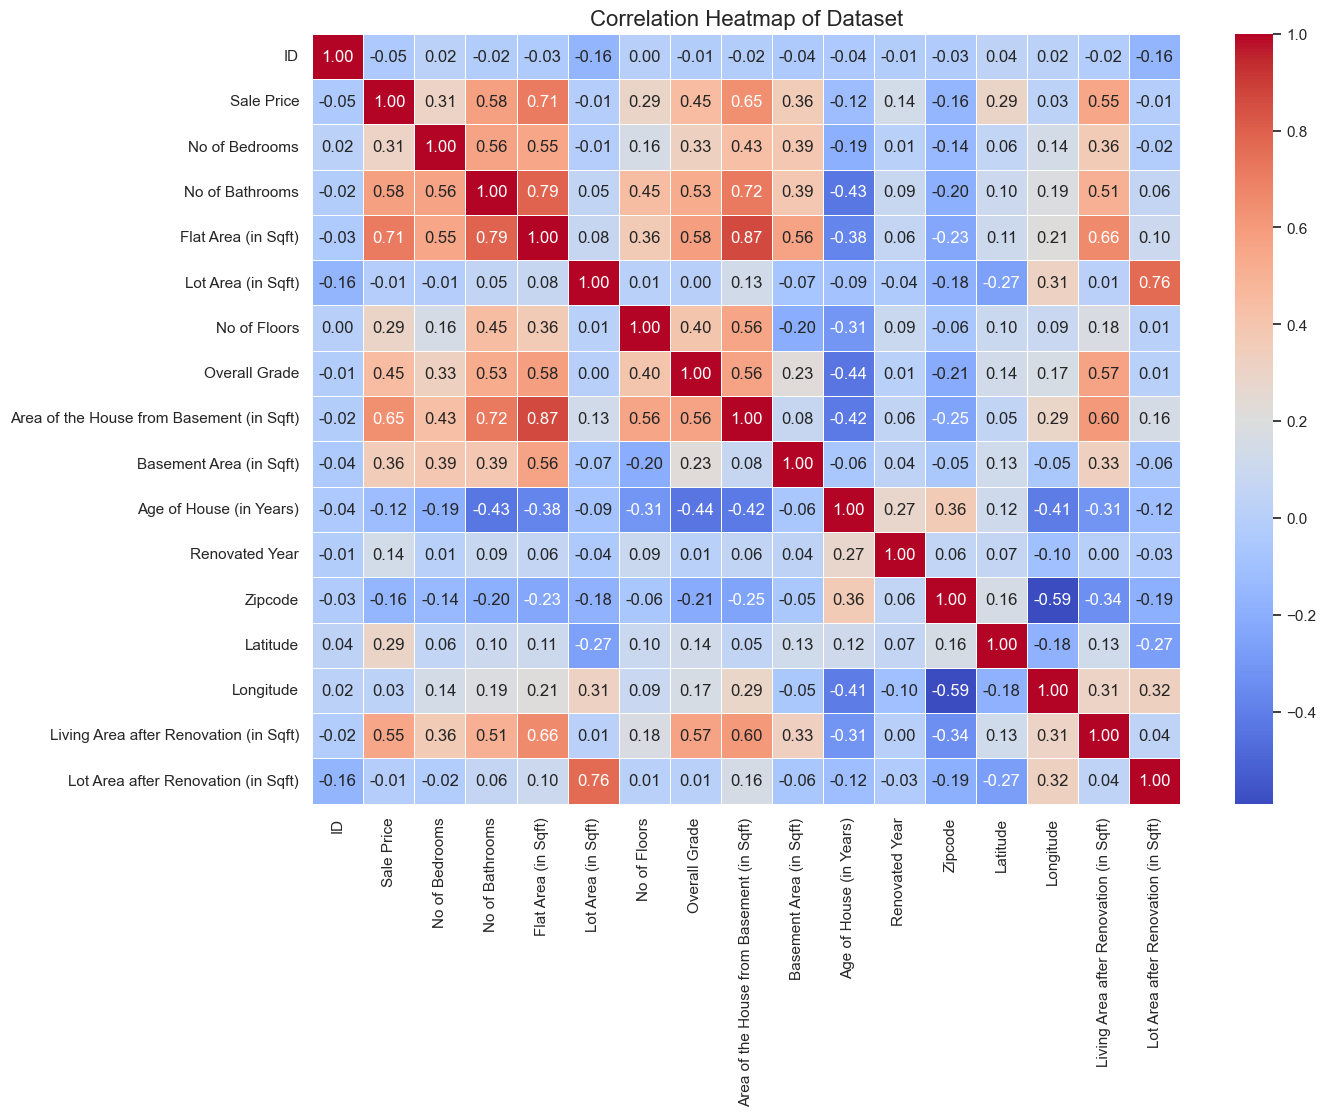

In [41]:
#Visualizations

#Histogram for Numerical Features
df.hist(bins=30, figsize=(20,18), rwidth=0.4)
plt.suptitle("Histograms of Numerical Features")
plt.show()

#Correlation Heatmap
# Compute correlation matrix
corr_matrix = df.dropna().corr(numeric_only=True)

# Plot correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    linewidths=0.5,
    fmt=".2f"
)

plt.title("Correlation Heatmap of Dataset", fontsize=16)
plt.show()

